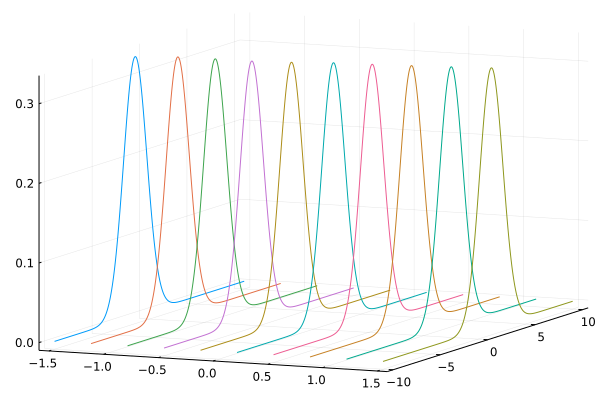

In [1]:
using Distributions
using Plots

Distributions.Normal{T}(; μ, σ) where T = Normal{T}(μ, σ)
normals = [
    Normal{Float64}(μ=-0.42117172154916505, σ=1.2253594150160463)
    Normal{Float64}(μ=1.4244177594878171, σ=1.2253594150160463)
    Normal{Float64}(μ=-0.7646882557011875, σ=1.2253594150160463)
    Normal{Float64}(μ=-1.4994608515495296, σ=1.2253594150160463)
    Normal{Float64}(μ=0.1588834413196244, σ=1.2253594150160463)
    Normal{Float64}(μ=0.6906462431515679, σ=1.2253594150160463)
    Normal{Float64}(μ=-0.8610106914769075, σ=1.2253594150160463)
    Normal{Float64}(μ=0.39571181451559956, σ=1.2253594150160463)
    Normal{Float64}(μ=-0.7506648963208741, σ=1.2253594150160463)
    Normal{Float64}(μ=1.0347673088571538, σ=1.2253594150160463)
] |> x -> sort(x; by=mean)

ys = range(-10, 10; length=300)
m, n = length(normals), length(ys)
plot(legend=false)
for (x, normal) in zip(range(-1.5, 1.5; length=m), normals)
    plot3d!(fill(x, n), ys, pdf.(normal, ys))
end
plot!()

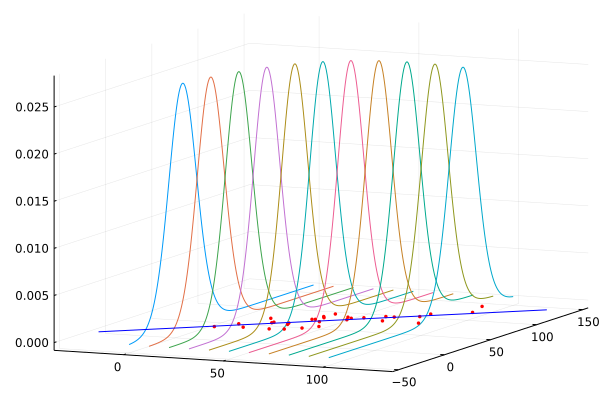

In [2]:
using LinearAlgebra
using Distributions
using Plots

dist_true = MvNormal([50, 50], 25^2*[1 1; 1 1.3])
n = 30
sample = rand(dist_true, n)
x, y = sample[1,:], sample[2,:]
X = x .^ (0:1)'
b̂ = X\y # b\hat TAB -> b̂
ŷ = X*b̂
u = norm(y - ŷ)/√(n - 2)
f(x) = evalpoly(x, b̂)
s(x) = u*√(1 + dot([1, f(x)], X'X\[1, f(x)]))
#disty(x) = Normal(f(x), s(x))
disty(x) = LocationScale(f(x), s(x), TDist(n-2))

plot(legend=false, xtick=-100:50:200, ytick=-100:50:200)
for xs in 0:10:100
    ys = range(-50, 150; length=200)
    plot3d!(fill(xs, length(ys)), ys, pdf.(disty(xs), ys))
end
scatter3d!(x, y, zeros(n); ms=2, msc=:auto, color=:red)
xs = range(-30, 130; length=100)
plot3d!(xs, f.(xs), zero(xs); color=:blue)